# **SyriaTel Customer Churn: Phase 3 Project**

### By: Dean Muimi Mutie

## **Business understanding**
### Business Problem 
SyriaTel, a telecommunication company is losing revenue because some of their customers stop using its services. Replacing these customers is more expensive than keeping the existing ones. The company has the customer data on services used, billing details, account history and demographics but is not using this information to predict churn. A binary classification model that predicts whether a customer is likely to leave SyriaTel soon is therefore needed so that retention actions can be taken early on high-risk customers and protect revenue

### Objectives
* To build a binary classification model that accurately predicts whether a SyriaTel customer will churn using usage patterns, service plans and customer service interaction data
* To identify key factors that are strongly associated with customer churn
* To compare multiple binary classification models and identify patterns and select the most effective approach for churn
* To measure how well the model generalizes to unseen data to ensure reliability
* To support data-driven decision making aimed at reducing customer loss and improve revenue

## **Data Understanding**
The datasets used in this analyisis were sourced from Kaggle https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset 

##  **Data Preparation**
In this section I performed some basic data inspection to check the datasets. 

In [272]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats

#Class Imbalance Handling 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import pipeline as ImbPipeline

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Train test
from sklearn.model_selection import(train_test_split, GridSearchCV, cross_validate, cross_val_score, StratifiedKFold)
from sklearn.metrics import(accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, classification_report)

In [273]:
# Read the dataframe
churn_df = pd.read_csv('SyriaTel_Customer_Churn.csv')
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data inspection

In [274]:
print(churn_df.shape)
print(churn_df.info())

(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 

In [275]:
churn_df.duplicated().sum()

np.int64(0)

#### As interpreted above, the dataset has 21 Feature and 3333 entries with no duplicates or missing values

In [276]:
# Generate a naming for the columns
column_names = churn_df.columns
new_column_names = []

for item in column_names:
    new_column_names.append(item.replace(' ','_'))
    
churn_df.columns = new_column_names
churn_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [277]:
churn_df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [278]:
# Numerical columns (names)
numerical_columns = churn_df.select_dtypes(include='number').columns
print("Numerical columns:", list(numerical_columns))
print("Number of numerical columns:", len(numerical_columns))

# Categorical columns (names)
categorical_columns = churn_df.select_dtypes(exclude='number').columns
print("Categorical columns:", list(categorical_columns))
print("Number of categorical columns:", len(categorical_columns))

Numerical columns: ['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']
Number of numerical columns: 16
Categorical columns: ['state', 'phone_number', 'international_plan', 'voice_mail_plan', 'churn']
Number of categorical columns: 5


In [279]:
churn_df.drop(['phone_number'],axis=1,inplace=True)

## Explanatory Data Analysis
#### For better understanding of the data, we look at the several relationship between different variables  relating to the target variable customer churn

##### 1. Churn Distribution

churn
False    2850
True      483
Name: count, dtype: int64


Text(0.5, 1.0, 'Churn Distribution')

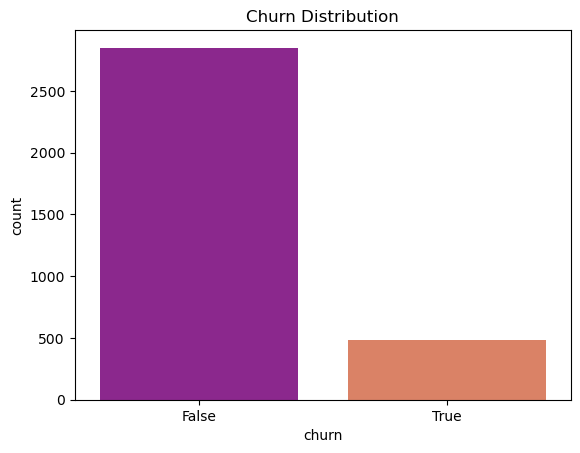

In [280]:
print(churn_df.churn.value_counts())
sns.countplot(data=churn_df, x='churn', palette='plasma')
plt.title('Churn Distribution')

##### Out of the 3333 customers, 483 turn to be false as they have terminated their contract with SyriaTel. The distribution shows a class imbalance and needs to be addressed before modeling so as the model doesn't make false predictions.

#### 2. Distribution of customers by Area Code

In [281]:
area = churn_df['area_code'].value_counts()
transuction = area.index
quantity = area.values
figure = px.pie(churn_df, 
                values= quantity, 
                names= transuction, 
                hole = .5, 
                title= 'Distribution of customers by Area Code')
figure.show()

##### 49.7% of customers originate from the area code 415 25.2% from 510 and 25.1% from area code 408

#### 3. Customer churn in relation to customer service calls

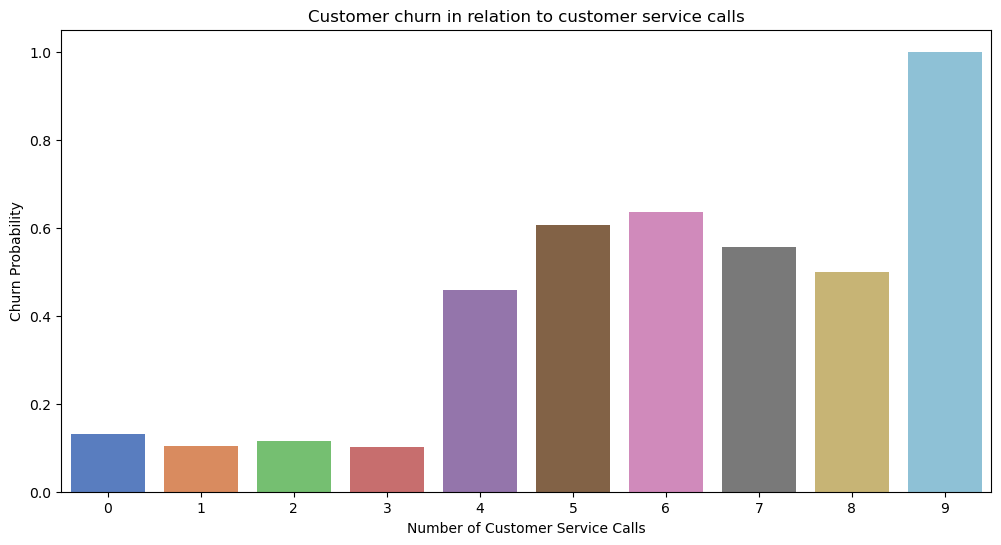

In [282]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=churn_df,
    x='customer_service_calls',
    y='churn',
    errorbar=None,
    palette='muted'
)

plt.title('Customer churn in relation to customer service calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Probability')

plt.show()

#### As seen, as the number of customer  service calls increases, the higher the chance of customer's churn.

#### 4.Correlation heatmap for Numeric features

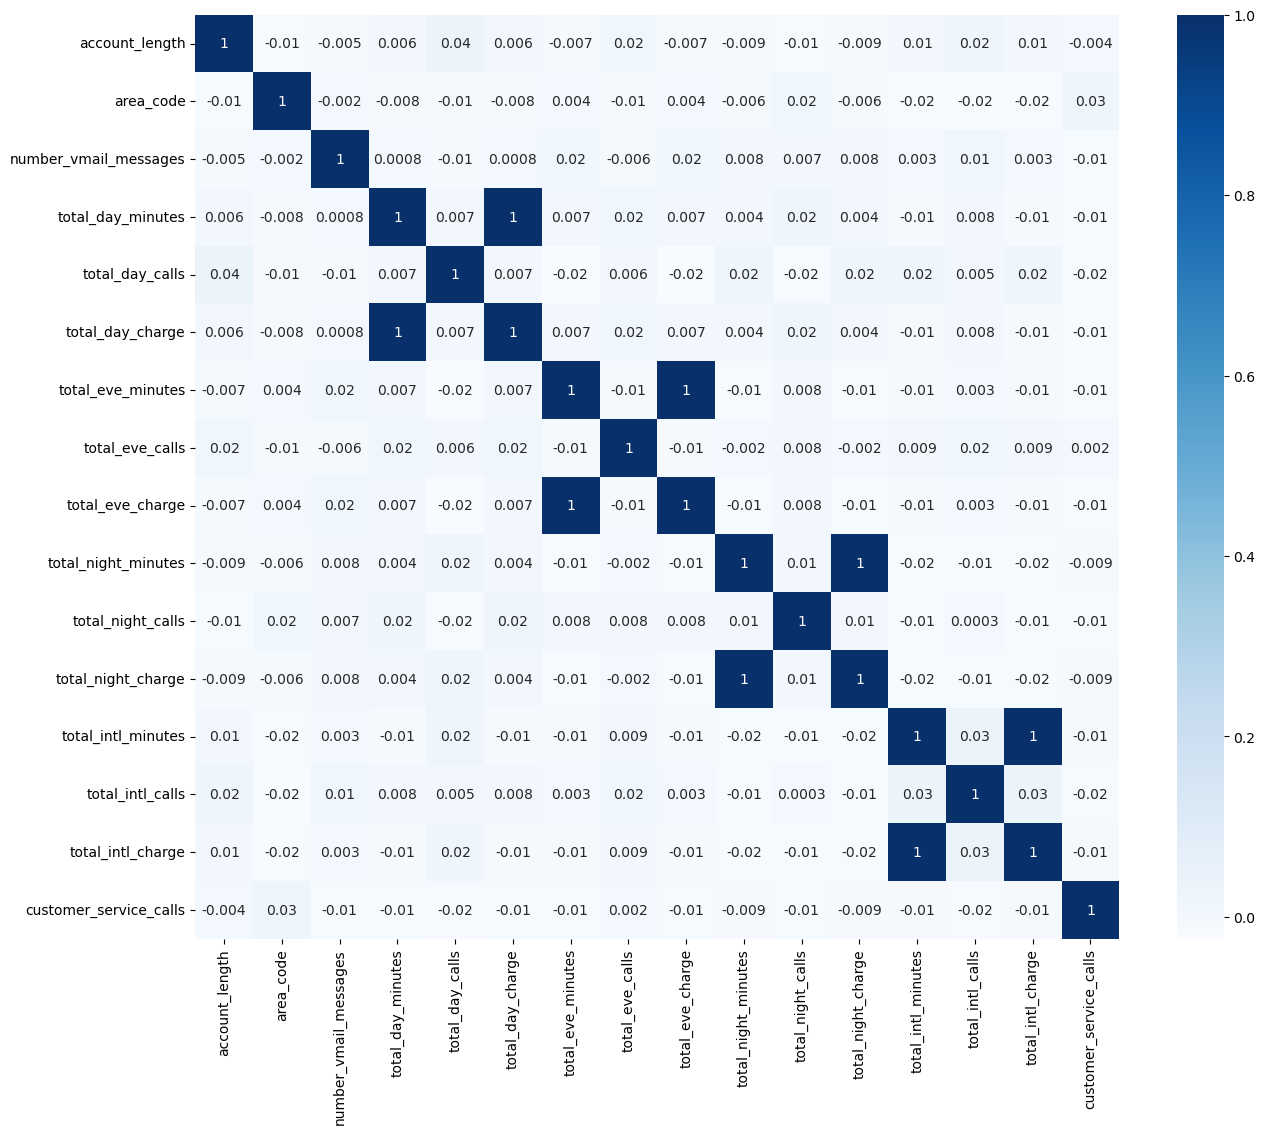

In [283]:
corr_mat = churn_df[numerical_columns].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

##### Most of the features are not correlated however some do share a perfect correlation of 1 indicates. 

### Preprocessing pipeline 
#### Feature Engineering

In [284]:
churn_df['total_minutes'] = (churn_df['total_day_minutes'] + churn_df['total_eve_minutes'] + churn_df['total_night_minutes'] + churn_df['total_intl_minutes'])
churn_df['total_charges'] = (churn_df['total_day_charge'] + churn_df['total_eve_charge'] + churn_df['total_night_charge'] + churn_df['total_intl_charge'])
churn_df['total_calls'] = (churn_df['total_day_calls'] + churn_df['total_eve_calls'] + churn_df['total_night_calls'] + churn_df['total_intl_calls'])


In [285]:
drop_cols = ['total_day_calls','total_eve_calls','total_night_calls','total_intl_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge', 'area_code','state']
clean_churn_df = churn_df.drop(columns=drop_cols)
clean_churn_df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,churn,total_minutes,total_charges,total_calls
0,128,no,yes,25,1,False,717.2,75.56,303
1,107,no,yes,26,1,False,625.2,59.24,332
2,137,no,no,0,0,False,539.4,62.29,333
3,84,yes,no,0,2,False,564.8,66.80,255
4,75,yes,no,0,3,False,512.0,52.09,359
...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,2,False,660.7,60.10,292
3329,68,no,no,0,3,False,585.4,63.53,239
3330,28,no,no,0,2,False,675.6,67.74,264
3331,184,yes,no,0,2,False,517.6,57.53,336


### Preprocessing Pipline
#### Define Target(y) and Predictor(X)


In [286]:
y = clean_churn_df['churn']
X = clean_churn_df.drop(columns=['churn'])

#### Feature groups

In [287]:
categorical_features = ['international_plan', 'voice_mail_plan']
numerical_features = ['account_length', 'number_vmail_messages', 'customer_service_calls', 'total_minutes', 'total_charges', 'total_calls']

In [ ]:
# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])
log_reg_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])